In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [308]:
df = pd.read_csv("C:/AI_File/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [309]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [310]:
# 결측치 확인
print("\n 결측값 확인:")
print(df.isnull().sum())


 결측값 확인:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [311]:
# 레이블 갯수 확인 (변환 전)
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [312]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [313]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [314]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [315]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [316]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# 딥러닝

In [317]:
#원-핫 인코딩
Y = pd.get_dummies(y).values

In [318]:
X= X.values

In [319]:
Y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [320]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [321]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 2), (154, 2))

In [322]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


In [337]:
#인공신경망 모델
model = Sequential()

model.add(Dense(50,input_shape=(8,),activation='relu')) 
#input_shape=(n,)에서 n은 한 개의 샘플이 가진 피처(열)의 개수

model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile('Adam','binary_crossentropy',metrics=['accuracy'])
#다중 클래스 categorical_crossentropy 사용
#이진 클래스 binary_crossentropy 사용
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 50)                450       
                                                                 
 dense_155 (Dense)           (None, 40)                2040      
                                                                 
 dense_156 (Dense)           (None, 20)                820       
                                                                 
 dense_157 (Dense)           (None, 10)                210       
                                                                 
 dense_158 (Dense)           (None, 4)                 44        
                                                                 
 dense_159 (Dense)           (None, 2)                 10        
                                                                 
Total params: 3,574
Trainable params: 3,574
Non-train

In [338]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
18/18 [==============================] - 1s 7ms/step - loss: 1.4200 - accuracy: 0.3895 - val_loss: 0.7449 - val_accuracy: 0.4516
Epoch 2/30
18/18 [==============================] - 0s 2ms/step - loss: 0.7242 - accuracy: 0.4638 - val_loss: 0.6939 - val_accuracy: 0.4839
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5888 - val_loss: 0.6877 - val_accuracy: 0.6935
Epoch 4/30
18/18 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.6757 - val_loss: 0.6874 - val_accuracy: 0.6129
Epoch 5/30
18/18 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.6395 - val_loss: 0.6877 - val_accuracy: 0.6129
Epoch 6/30
18/18 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.6667 - val_loss: 0.6891 - val_accuracy: 0.5484
Epoch 7/30
18/18 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.6178 - val_loss: 0.6888 - val_accuracy: 0.6452
Epoch 8/30
18/18 [==

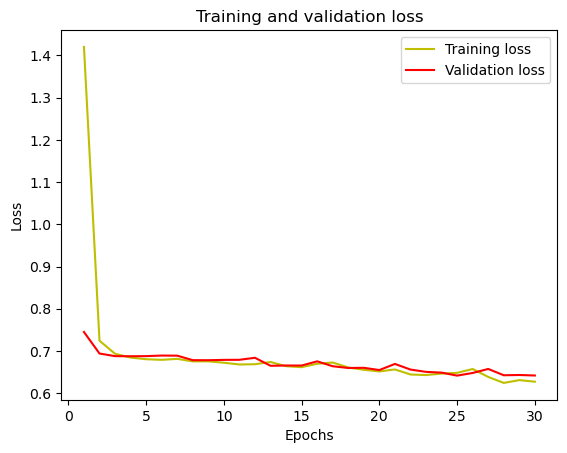

In [339]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

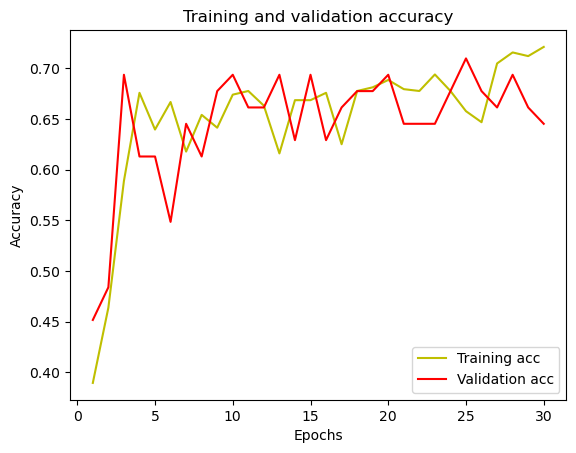

In [340]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [341]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       107
           1       0.61      0.60      0.60        47

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.76      0.76      0.76       154

[[89 18]
 [19 28]]
